# Milestone 2: Greenhouse Emissions by Country



# INST737: Introduction to Data Science

by: Marta Alejandra Gonzalez, Robin Godinho, Sai Abhishek Gangineni


In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/INST737 Final Project/Final Dataset.xlsx', sheet_name = 'Features')
print(df.head)

<bound method NDFrame.head of       CountryID      Country  Year  \
0             1  Afghanistan  2000   
1             1  Afghanistan  2001   
2             1  Afghanistan  2002   
3             1  Afghanistan  2003   
4             1  Afghanistan  2004   
...         ...          ...   ...   
2795        175     Zimbabwe  2011   
2796        175     Zimbabwe  2012   
2797        175     Zimbabwe  2013   
2798        175     Zimbabwe  2014   
2799        175     Zimbabwe  2015   

      Fossil fuel energy consumption (% of total)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
2795                                          NaN   
2796                                          NaN   
2797                                

#Linear Regressions

In [4]:
#dropping null values
df_new = df.dropna(how='any')
#printing the new dataframe
print(df_new)

      CountryID        Country  Year  \
128           9      Australia  2000   
129           9      Australia  2001   
130           9      Australia  2002   
131           9      Australia  2003   
132           9      Australia  2004   
...         ...            ...   ...   
2683        168  United States  2011   
2684        168  United States  2012   
2685        168  United States  2013   
2686        168  United States  2014   
2687        168  United States  2015   

      Fossil fuel energy consumption (% of total)  \
128                                     89.328168   
129                                     98.053088   
130                                     95.890215   
131                                     93.886025   
132                                     94.068213   
...                                           ...   
2683                                    83.714053   
2684                                    83.437178   
2685                                    82

We coded one Linear Regression model and ran it for each individual feature as well as used it for the multivariate regression.

In [5]:
#defining the independent feature
feature_cols = ['Population, total']

#assigning independent and dependent to X and y
X = df_new[feature_cols]
y = df_new['GHG Emissions per Capita (tCO2e)']

#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#fitting the linear regression model
linreg = LinearRegression()
reg = linreg.fit(X_train, y_train)

#obtaining the model scores for training and testing
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))

Training Score:  0.051658205270255886
Testing Score:  0.07870822412353429


In [6]:
#Printing the intercept
print('Intercept: ', reg.intercept_)
#Printing the coefficient
print('Slope: ', reg.coef_)

y_pred = reg.predict(X_test)

Intercept:  9.097719999605186
Slope:  [1.74315358e-08]


We defined the upper and lower bands of the prediction interval and plotting the prediction results as well as the training set with the regression band.

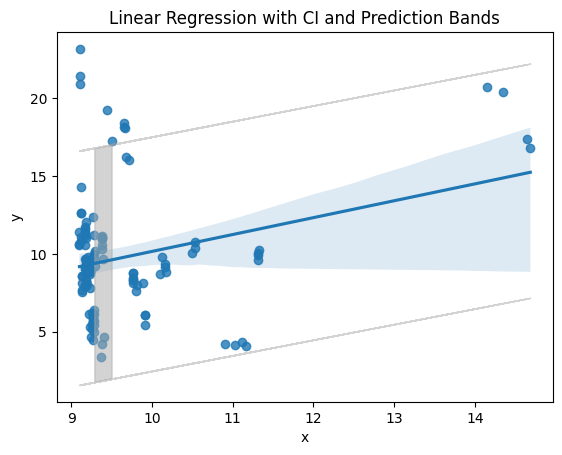

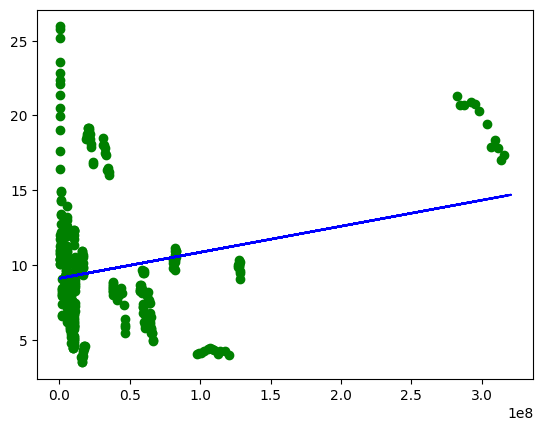

In [7]:
#defining prediction interval
std_error = np.std(y_test - y_pred)
t_value = 1.96
lower_band = y_pred - t_value * std_error
upper_band = y_pred + t_value * std_error
#assigning prediction set to dataframe
predictions = pd.DataFrame(({'x': y_pred, 'y': y_test}))
#plotting the results with confidence interval and prediction bands
sns.regplot(x='x', y='y', data = predictions, fit_reg = True)
plt.fill_between(predictions['x'].squeeze(), lower_band, upper_band, color = 'darkgrey', alpha = .5, label = 'Prediction Bands ')
plt.title('Linear Regression with CI and Prediction Bands')
plt.show()

#scatterplot of training set
plt.scatter(X_train, y_train, color='g')
plt.plot(X_test, y_pred, color = 'b')
plt.show()

We found the Mean Absolute Error, the Mean Squared Error, the Root Mean Squared Error and the residuals.

In [8]:
#print mean absolute error
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
#print mean squared error
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
#print root mean squared error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#find and print residuals
residuals = y_test - y_pred
print('Residuals: ', residuals)

MAE:  2.7024417367402482
MSE:  14.698710960853472
RMSE:  3.8338897950845525
Residuals:  141      7.763380
865      2.860786
809      1.684441
1236    -1.407292
1130     2.310359
          ...    
2687     2.074064
1210    -0.013048
1475    14.032817
1105    -3.374981
977      0.412690
Name: GHG Emissions per Capita (tCO2e), Length: 120, dtype: float64


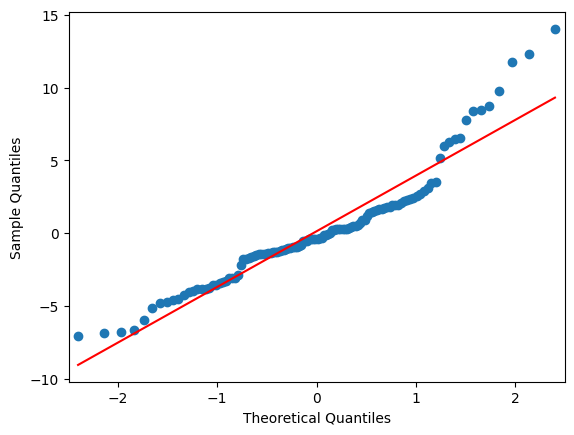

In [9]:
sm.qqplot(residuals, line='s');

We found the correlation coefficients between the predicted and real values for each run.

In [10]:
r = np.corrcoef(y_test, y_pred)
print(r)
stats.pearsonr(y_test, y_pred)

[[1.         0.28314228]
 [0.28314228 1.        ]]


PearsonRResult(statistic=0.2831422827182864, pvalue=0.0017268295244035746)

We conducted the Ridge method of regularization for each run.

In [11]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_model = ridge_pipe.fit(X_train, y_train)

print('Training Score: ', ridge_model.score(X_train, y_train))
print('Test Score: ', ridge_model.score(X_test, y_test))

#new prediction set
y_pred = ridge_model.predict(X_test)

Training Score:  0.18390069985205115
Test Score:  0.1692950814631865


We calculated a new MSE for the new prediction set.

In [12]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  13.25344674841557


We found the new correlation coefficient for the new prediction set against the real values.

In [13]:
r = np.corrcoef(y_test, y_pred)
print(r)
stats.pearsonr(y_test, y_pred)

[[1.         0.41898111]
 [0.41898111 1.        ]]


PearsonRResult(statistic=0.41898110595159904, pvalue=1.9103820970687203e-06)

We conducted the Lasso method of regularization for each run.

In [14]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_model = lasso_pipe.fit(X_train, y_train)

print('Training score: ', lasso_model.score(X_train, y_train))
print('Test score: ', lasso_model.score(X_test, y_test))

#new prediction set
y_pred = lasso_model.predict(X_test)

Training score:  0.1558513614312116
Test score:  0.1629468901056782


We calculated a new MSE for the new prediction set.

In [15]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

MSE:  13.35472870092126


We found the new correlation coefficient for the new prediction set against the real values.

In [16]:
ar = np.corrcoef(y_test, y_pred)
print(ar)
stats.pearsonr(y_test, y_pred)

[[1.         0.40474597]
 [0.40474597 1.        ]]


PearsonRResult(statistic=0.40474597452107186, pvalue=4.536814401193512e-06)

#Logistic Regression

In [17]:
df['Binary Class'] = [0 if x < 3.5 else 1 for x in df['GHG Emissions per Capita (tCO2e)']]
df.head(50)

,CountryID,Country,Year,Fossil fuel energy consumption (% of total),"GDP per capita, PPP (current international $)",Agricultural land (% of land area),Forest area (% of land area),Urban population (% of total population),Access to Clean Fuels and Technologies for cooking (% of total population),Access to electricity (% of rural population with access),...,Access to electricity (% of urban population with access),Energy intensity level of primary energy (MJ/PPP),Renewable electricity share of total electricity output (%),Renewable energy share of TFEC (%),"Population, total",Total electricity output per capita (kWh),Total final energy consumption per Capita (TFEC) (MJ),GHG Emissions per Capita (tCO2e),GHG Emission Class,Binary Class
0,1,Afghanistan,2000,NaN,NaN,57.945817,1.852782,22.078,8.80,NaN,...,69.640984,1.686173,74.989094,54.243126,19542982,35.189103,1066.096009,0.053728,Low (0-1.5 tCO2e),0
1,1,Afghanistan,2001,NaN,NaN,57.947350,1.852782,22.169,9.51,NaN,...,71.371780,1.827399,72.811460,54.055055,19688632,35.101474,1081.518700,0.054346,Low (0-1.5 tCO2e),0
2,1,Afghanistan,2002,NaN,NaN,57.939684,1.852782,22.261,10.39,NaN,...,73.099968,1.360283,79.063971,43.771149,21000256,34.390057,1305.159976,0.063809,Low (0-1.5 tCO2e),0
3,1,Afghanistan,2003,NaN,NaN,58.083805,1.852782,22.353,11.46,NaN,...,74.828354,1.325028,70.249729,42.276141,22645130,43.099775,1319.801230,0.068889,Low (0-1.5 tCO2e),0
4,1,Afghanistan,2004,NaN,NaN,58.151266,1.852782,22.500,12.43,NaN,...,76.559761,1.143996,70.890841,49.843148,23553551,33.116026,1096.244040,0.052646,Low (0-1.5 tCO2e),0
5,1,Afghanistan,2005,NaN,NaN,58.134400,1.852782,22.703,13.49,NaN,...,74.000000,1.267647,74.061810,40.859171,24411191,37.114125,1327.995858,0.077424,Low (0-1.5 tCO2e),0
6,1,Afghanistan,2006,NaN,NaN,58.123668,1.852782,22.907,14.81,NaN,...,80.042892,1.408623,70.755750,37.137249,25442944,35.884212,1515.997318,0.084896,Low (0-1.5 tCO2e),0
7,1,Afghanistan,2007,NaN,NaN,58.129801,1.852782,23.113,15.99,NaN,...,81.800255,1.460938,72.000000,33.862579,25903301,36.674862,1740.917200,0.108094,Low (0-1.5 tCO2e),0
8,1,Afghanistan,2008,NaN,NaN,58.132867,1.852782,23.320,17.44,NaN,...,89.900000,2.147590,68.654822,21.343708,26427199,29.817765,2714.782375,0.160819,Low (0-1.5 tCO2e),0
9,1,Afghanistan,2009,NaN,NaN,58.132867,1.852782,23.528,18.84,NaN,...,85.354507,2.617060,87.176603,17.813855,27385307,32.462663,3454.875204,0.233337,Low (0-1.5 tCO2e),0


In [18]:
df_new = df.dropna(how='any')
print(df_new)

      CountryID        Country  Year  \
128           9      Australia  2000   
129           9      Australia  2001   
130           9      Australia  2002   
131           9      Australia  2003   
132           9      Australia  2004   
...         ...            ...   ...   
2683        168  United States  2011   
2684        168  United States  2012   
2685        168  United States  2013   
2686        168  United States  2014   
2687        168  United States  2015   

      Fossil fuel energy consumption (% of total)  \
128                                     89.328168   
129                                     98.053088   
130                                     95.890215   
131                                     93.886025   
132                                     94.068213   
...                                           ...   
2683                                    83.714053   
2684                                    83.437178   
2685                                    82

In [19]:
# Split dataset into features and target variable
X = df_new.drop(columns=['Binary Class', 'GHG Emission Class', 'CountryID', 'Country', 'Year', 'GHG Emissions per Capita (tCO2e)'], axis=1)  # Features
y = df_new['Binary Class']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get intercept and coefficients of the logistic regression model
intercept = logreg.intercept_[0]
coefficients = logreg.coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -2.2557407301886526e-07
Coefficients: [-1.92289231e-05  2.53549637e-04  4.71881796e-06  2.61081950e-06
 -2.78559081e-05 -1.77180474e-05 -1.47183903e-05 -2.13058071e-05
 -2.23160337e-05 -1.26999009e-07 -3.15439658e-05 -1.54291766e-05
  1.37848977e-08  4.36317553e-04 -3.38541553e-05]


In [21]:
# Define unit increase for independent variable
unit_increase = 1

# Calculate log-odds for unit increase in independent variable
log_odds = coefficients * unit_increase

# Calculate odds ratios for unit increase in independent variable
odds_ratios = np.exp(log_odds)

# Print log-odds and odds ratios
for i, feature_name in enumerate(X_train.columns):
    print(f"Independent Variable: {feature_name}")
    print(f"Log-Odds for a Unit Increase: {log_odds[i]}")
    print(f"Odds Ratio for a Unit Increase: {odds_ratios[i]}")

Independent Variable: Fossil fuel energy consumption (% of total)
Log-Odds for a Unit Increase: -1.9228923133422446e-05
Odds Ratio for a Unit Increase: 0.9999807712617411
Independent Variable: GDP per capita, PPP (current international $)
Log-Odds for a Unit Increase: 0.0002535496367721389
Odds Ratio for a Unit Increase: 1.0002535817831981
Independent Variable: Agricultural land (% of land area)
Log-Odds for a Unit Increase: 4.718817956333046e-06
Odds Ratio for a Unit Increase: 1.00000471882909
Independent Variable: Forest area (% of land area)
Log-Odds for a Unit Increase: 2.6108194951520646e-06
Odds Ratio for a Unit Increase: 1.0000026108229034
Independent Variable: Urban population (% of total population)
Log-Odds for a Unit Increase: -2.7855908089574026e-05
Odds Ratio for a Unit Increase: 0.9999721444798826
Independent Variable: Access to Clean Fuels and Technologies for cooking (% of total population)
Log-Odds for a Unit Increase: -1.7718047441750187e-05
Odds Ratio for a Unit Incr

In [22]:
# Get absolute coefficients
absolute_coefficients = np.abs(coefficients)

# Sort the absolute coefficients and corresponding feature names
sorted_indices = np.argsort(absolute_coefficients)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_coefficients = absolute_coefficients[sorted_indices]

# Print the most predictive features
print("Most Predictive Features:")
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coef}")

Most Predictive Features:
Total electricity output per capita (kWh): 0.0004363175525127647
GDP per capita, PPP (current international $): 0.0002535496367721389
Total final energy consumption per Capita (TFEC) (MJ): 3.385415526168764e-05
Renewable electricity share of total electricity output (%): 3.154396575573661e-05
Urban population (% of total population): 2.7855908089574026e-05
Access to electricity (% of urban population with access): 2.23160336923816e-05
Access to electricity (% of total population): 2.130580711001168e-05
Fossil fuel energy consumption (% of total): 1.9228923133422446e-05
Access to Clean Fuels and Technologies for cooking (% of total population): 1.7718047441750187e-05
Renewable energy share of TFEC (%): 1.54291765778634e-05
Access to electricity (% of rural population with access): 1.4718390349165552e-05
Agricultural land (% of land area): 4.718817956333046e-06
Forest area (% of land area): 2.6108194951520646e-06
Energy intensity level of primary energy (MJ/PPP)

In [23]:
# Use the trained logistic regression model to make predictions on the testing dataset
y_pred = logreg.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.99


#Naive Bayes

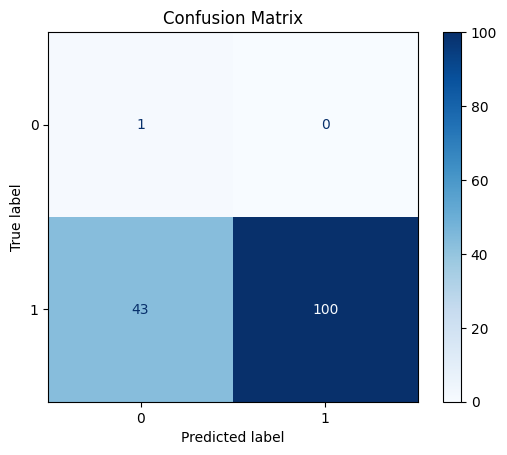

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

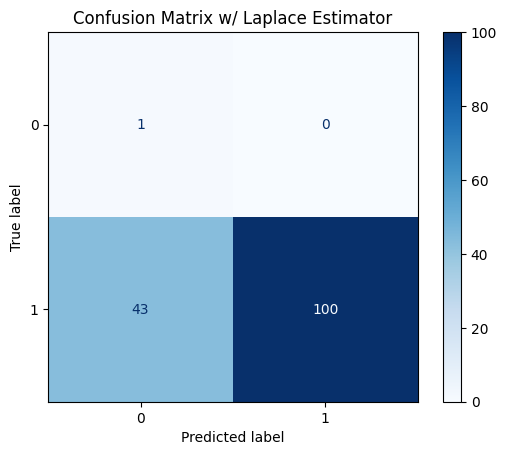

In [25]:
# Create and train the Naive Bayes classifier with Laplace smoothing
nb_classifier2 = MultinomialNB(alpha=1.0)  # Set alpha for Laplace smoothing (default is 1.0)
nb_classifier2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier2.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix w/ Laplace Estimator')
plt.show()

#Decision Trees & Random Forests

In [26]:
#Read data from the "Features" sheet
#Read the specific columns into the DataFrame
col_names =  ['Population, total', 'Agricultural land (% of land area)', 'Total electricity output per capita (kWh)', 'Total final energy consumption per Capita (TFEC) (MJ)', 'GHG Emissions per Capita (tCO2e)', 'GHG Emission Class']
df3 = pd.read_excel('/content/drive/MyDrive/INST737 Final Project/Final Dataset.xlsx', sheet_name = 'Features', usecols = col_names)
print(df3.tail(10))

      Agricultural land (% of land area)  Population, total  \
2790                           42.135195           12330490   
2791                           41.876696           12450568   
2792                           42.522942           12550347   
2793                           42.135195           12679810   
2794                           41.876696           12839771   
2795                           42.393693           13025785   
2796                           41.876696           13265331   
2797                           41.876696           13555422   
2798                           41.876696           13855753   
2799                           41.876696           14154937   

      Total electricity output per capita (kWh)  \
2790                                 646.689629   
2791                                 611.136777   
2792                                 607.552923   
2793                                 575.008616   
2794                                 674.856273   


In [27]:
df3.describe()

,Agricultural land (% of land area),"Population, total",Total electricity output per capita (kWh),Total final energy consumption per Capita (TFEC) (MJ),GHG Emissions per Capita (tCO2e)
count,2592.000000,2.800000e+03,2576.000000,2608.000000,2800.000000
mean,39.905523,3.644690e+07,3511.743131,51224.460894,4.812985
std,21.584310,1.384211e+08,5521.685286,57010.209942,6.681345
min,0.448718,9.609000e+03,0.000000,0.000000,0.019519
25%,21.712776,1.899871e+06,284.113336,14003.981099,0.593190
50%,41.084986,7.557865e+06,1575.915850,28953.459523,2.357686
75%,57.436346,2.302792e+07,4623.777843,68781.725064,6.610386
max,85.487373,1.379860e+09,56826.322869,365436.142945,67.498391


In [28]:
# Define mapping dictionary
mapping = {'Low (0-1.5 tCO2e)': 0, 'Mid (1.5-6 tCO2e)': 1, 'High (>6 tCO2e)': 2}

# Add a new column with mapped values
df3['Class Value'] = df3['GHG Emission Class'].map(mapping)

print(df3.head)

<bound method NDFrame.head of       Agricultural land (% of land area)  Population, total  \
0                              57.945817           19542982   
1                              57.947350           19688632   
2                              57.939684           21000256   
3                              58.083805           22645130   
4                              58.151266           23553551   
...                                  ...                ...   
2795                           42.393693           13025785   
2796                           41.876696           13265331   
2797                           41.876696           13555422   
2798                           41.876696           13855753   
2799                           41.876696           14154937   

      Total electricity output per capita (kWh)  \
0                                     35.189103   
1                                     35.101474   
2                                     34.390057   
3        

In [29]:
# Replace NaN values with 0
df3.fillna(0, inplace=True)

Splitting the DataFrame into Training and Testing

In [30]:
from sklearn.model_selection import train_test_split
# X contains the features, y contains the target variable
# Replace 'target_column' with the name of your target column
X = df3.drop(columns=['Class Value', 'GHG Emission Class'])  # Features
y = df3['Class Value']  # Target variable

# 80% of the data will be used for training and 20% for testing

# Split the data into training and testing sets
# test_size specifies the proportion of the dataset to include in the test split
# random_state is used to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are the training features and target
# X_test and y_test are the testing features and target

Visualization of  the  distribution of the training and testing datasets

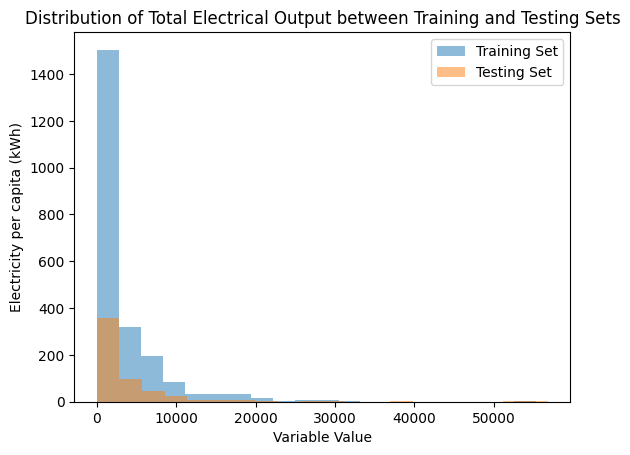

In [31]:
import matplotlib.pyplot as plt

# Plot histogram for a single variable from the training set
plt.hist(X_train['Total electricity output per capita (kWh)'], bins=20, alpha=0.5, label='Training Set')

# Plot histogram for the same variable from the testing set
plt.hist(X_test['Total electricity output per capita (kWh)'], bins=20, alpha=0.5, label='Testing Set')

# Add labels and title
plt.xlabel('Variable Value')
plt.ylabel('Electricity per capita (kWh)')
plt.title('Distribution of Total Electrical Output between Training and Testing Sets')
plt.legend()

# Show plot
plt.show()


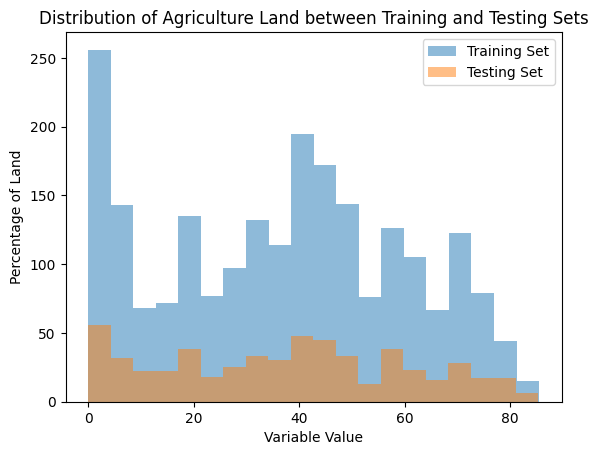

In [32]:
# Plot histogram for a single variable from the training set
plt.hist(X_train['Agricultural land (% of land area)'], bins=20, alpha=0.5, label='Training Set')

# Plot histogram for the same variable from the testing set
plt.hist(X_test['Agricultural land (% of land area)'], bins=20, alpha=0.5, label='Testing Set')

# Add labels and title
plt.xlabel('Variable Value')
plt.ylabel('Percentage of Land')
plt.title('Distribution of Agriculture Land between Training and Testing Sets')
plt.legend()

# Show plot
plt.show()


Training a Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
clf.fit(X_train, y_train)

# Predictions on training set
train_predictions = clf.predict(X_train)

# Predictions on testing set
test_predictions = clf.predict(X_test)


Interpreting the Main If-Then Rules

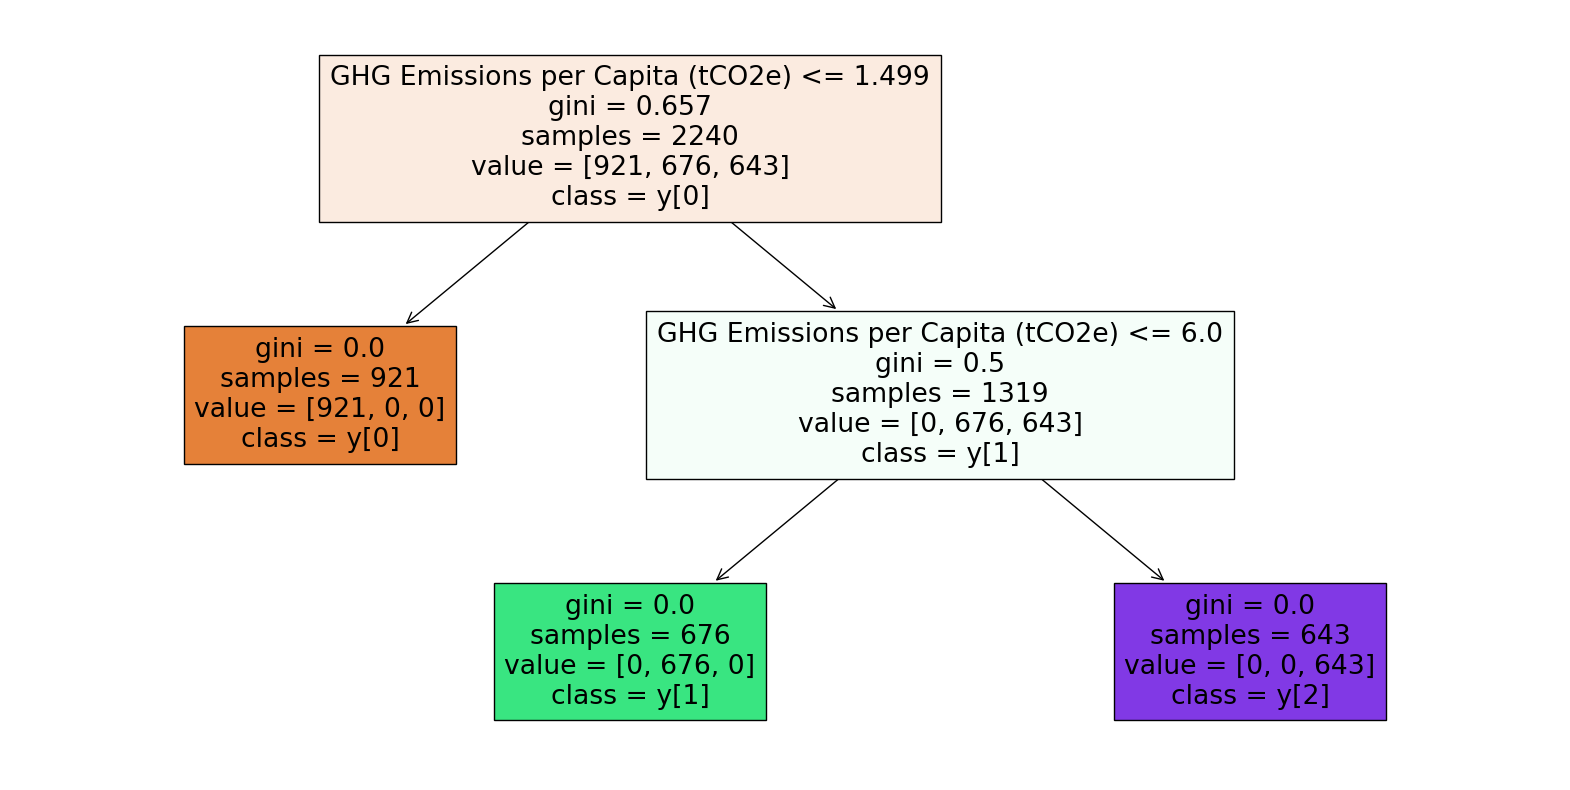

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, filled=True, class_names=True)
plt.show()

Comparing the Confusion Matrices

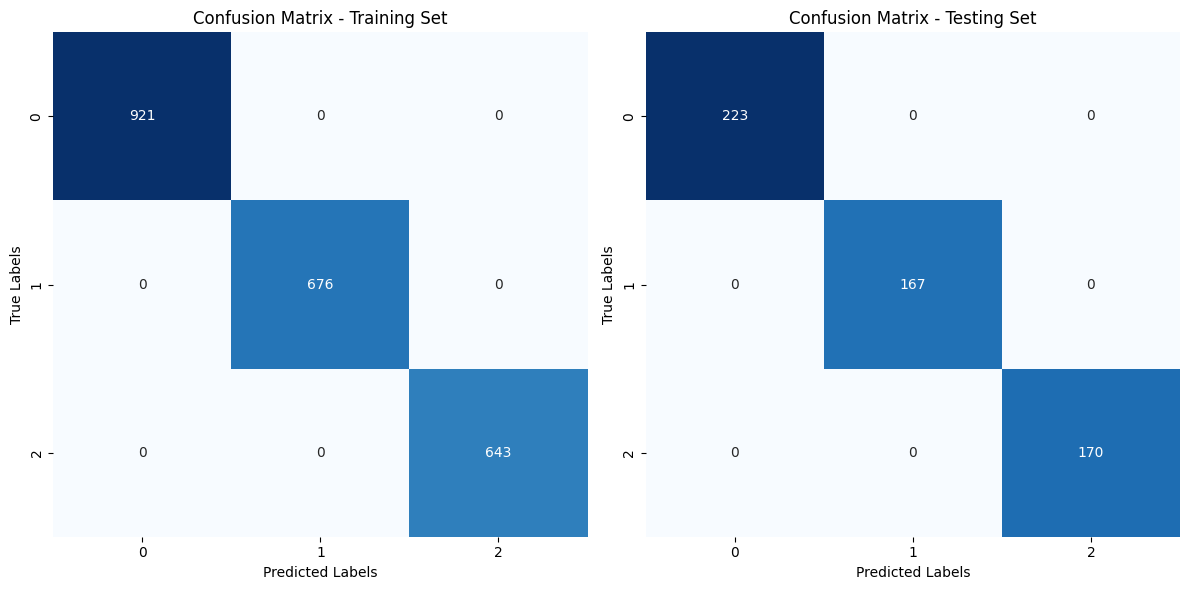

Training Accuracy: 1.00
Testing Accuracy: 1.00


In [35]:
# Confusion matrix for training set
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')


Gradient Boosting Classifier

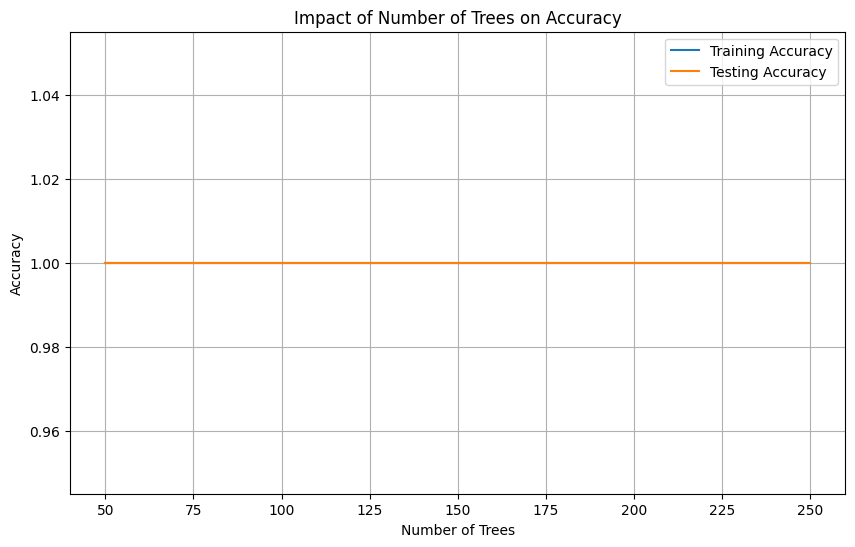

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define a list of numbers of trees to try
num_trees_list = [50, 100, 150, 200, 250]

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

for num_trees in num_trees_list:
    # Initialize Gradient Boosting Classifier with specified number of trees
    clf = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predictions on training set
    train_predictions = clf.predict(X_train)

    # Predictions on testing set
    test_predictions = clf.predict(X_test)

    # Calculate accuracy on training set
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

    # Calculate accuracy on testing set
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, train_accuracies, label='Training Accuracy')
plt.plot(num_trees_list, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Bagging**

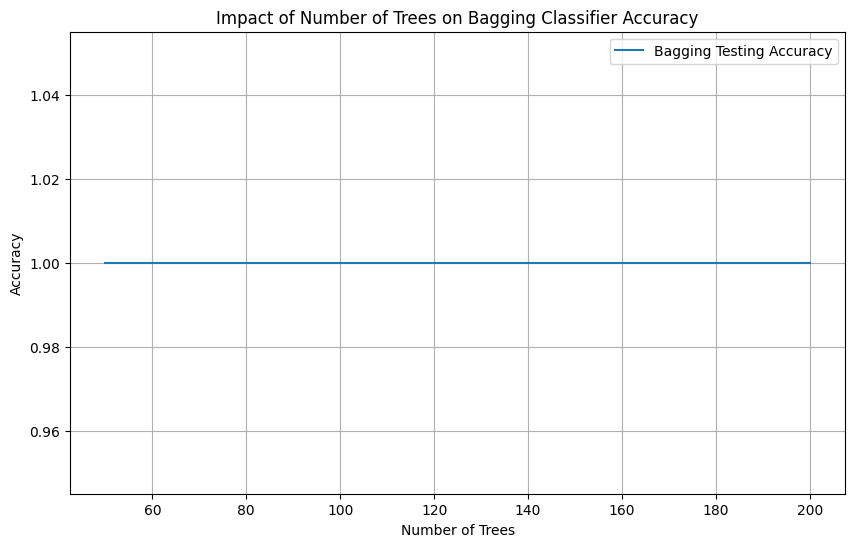

In [37]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a list of numbers of trees to try
num_trees_list = [50, 100, 150, 200]

# Initialize lists to store accuracy scores
bagging_test_accuracies = []

for num_trees in num_trees_list:
    # Initialize Bagging Classifier with specified number of trees
    bagging_clf = BaggingClassifier(n_estimators=num_trees, random_state=42)

    # Train the Bagging Classifier
    bagging_clf.fit(X_train, y_train)

    # Predictions on testing set
    bagging_test_predictions = bagging_clf.predict(X_test)

    # Calculate accuracy on testing set
    bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, bagging_test_accuracies, label='Bagging Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Bagging Classifier Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Forest Tree**

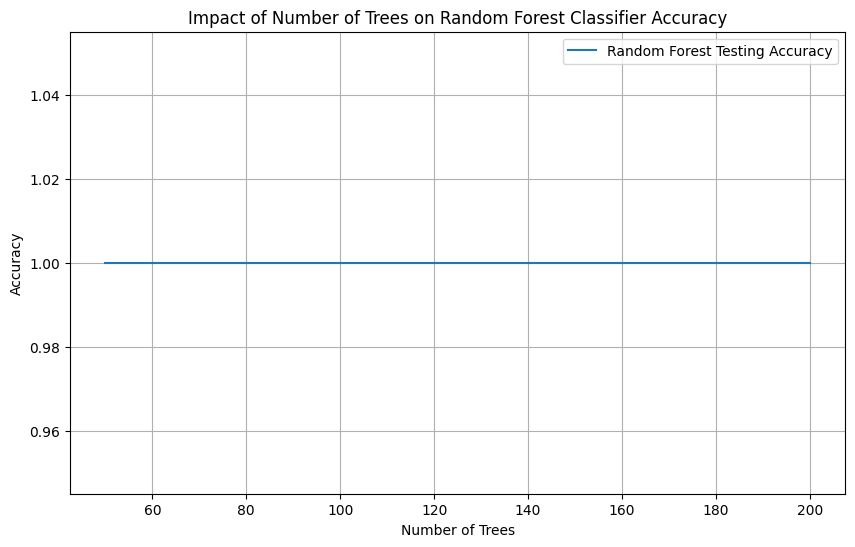

In [38]:
# Initialize lists to store accuracy scores
rf_test_accuracies = []

for num_trees in num_trees_list:
    # Initialize Random Forest Classifier with specified number of trees
    rf_clf = RandomForestClassifier(n_estimators=num_trees, random_state=42)

    # Train the Random Forest Classifier
    rf_clf.fit(X_train, y_train)

    # Predictions on testing set
    rf_test_predictions = rf_clf.predict(X_test)

    # Calculate accuracy on testing set
    rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
    rf_test_accuracies.append(rf_test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, rf_test_accuracies, label='Random Forest Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Random Forest Classifier Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Important Features of Forest Tree

In [39]:
# Train Random Forest Classifier with a selected number of trees
selected_num_trees = 100  # Choose the number of trees
rf_clf = RandomForestClassifier(n_estimators=selected_num_trees, random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head())


                                             Feature  Importance
4                   GHG Emissions per Capita (tCO2e)    0.659130
2          Total electricity output per capita (kWh)    0.175586
3  Total final energy consumption per Capita (TFE...    0.139785
1                                  Population, total    0.013759
0                 Agricultural land (% of land area)    0.011739
